In [234]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
df = pd.read_csv('tellecom.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [236]:
# Totalcharges 컬럼에서 숫자형태의 문자가 아닌 값은 결측치 처리한다
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<Axes: >

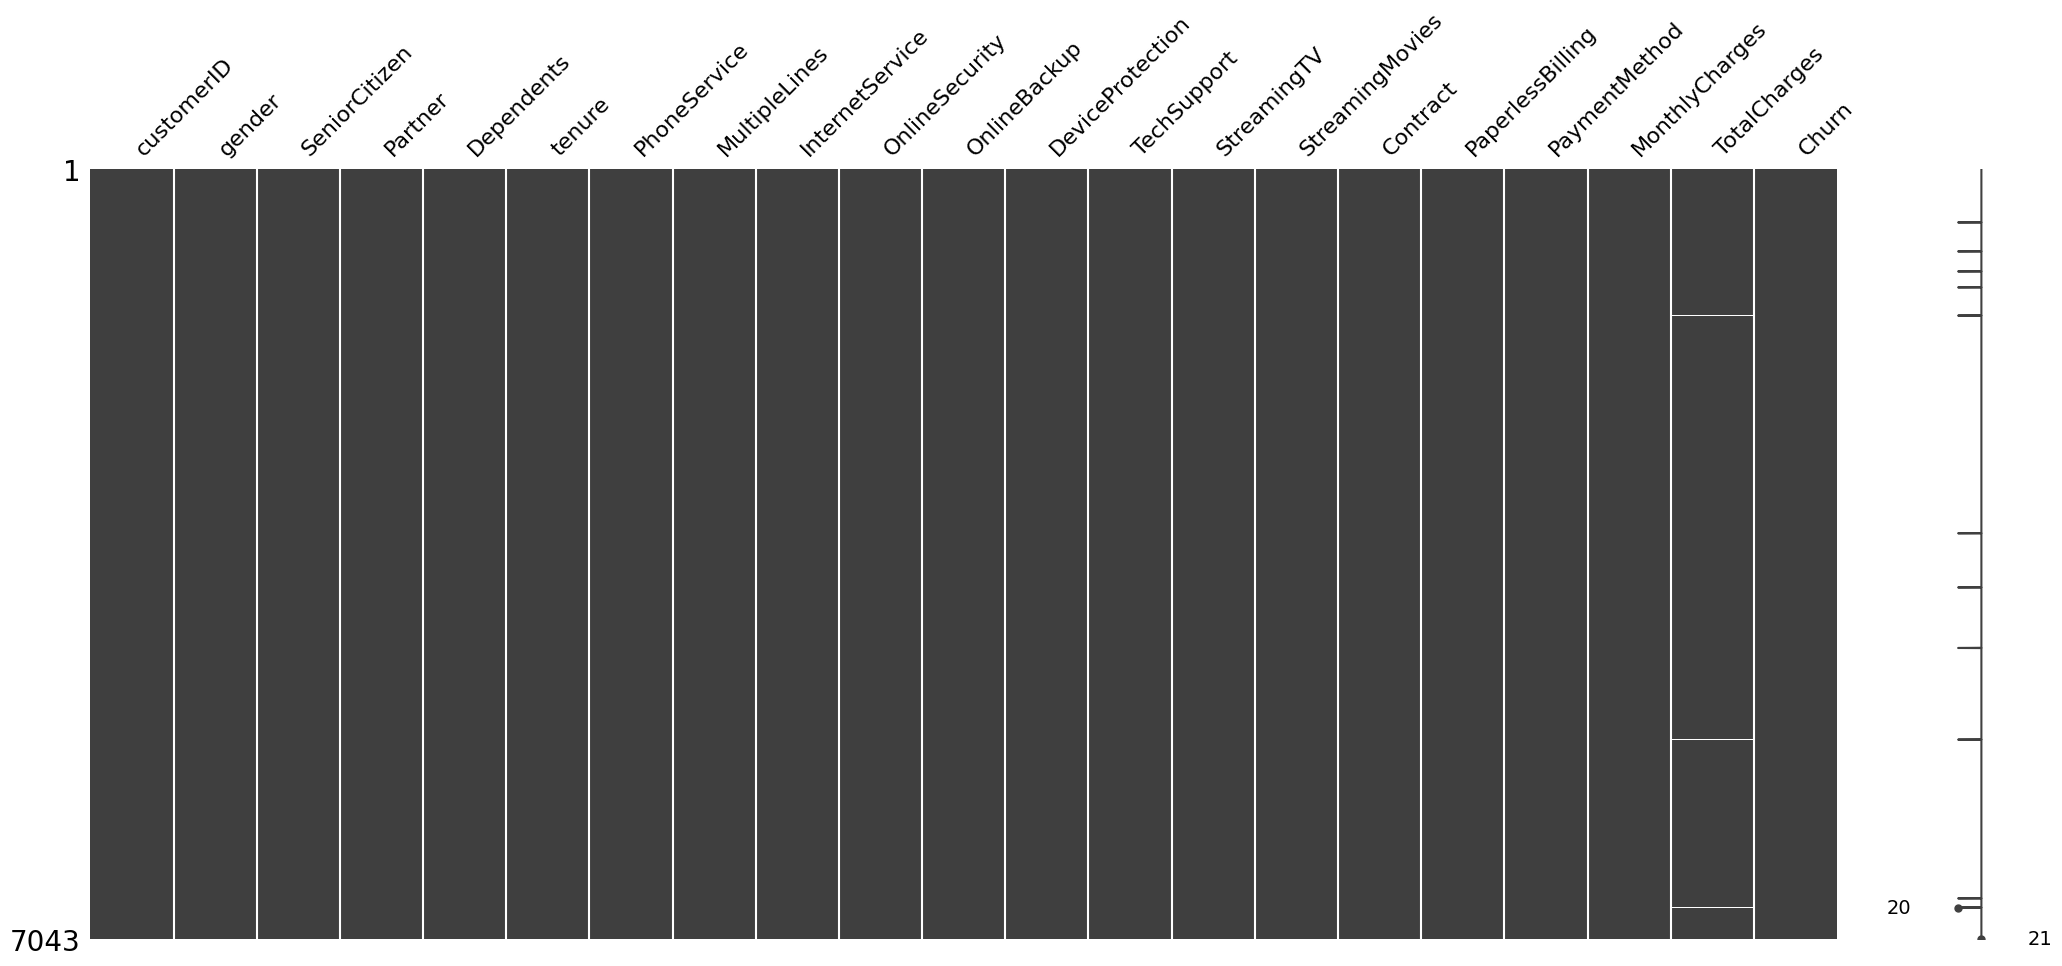

In [237]:
# 결측치 시각화
msno.matrix(df)

In [238]:
df.isna().mean() # Totalcharges 결측치 비율은 0.001562 --> 해당 결측치 row 데이터 삭제
df = df.dropna(subset=['TotalCharges'])
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [239]:
# 이탈여부 Churn --> Yes / No  1 0 으로 변환
# df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
# df['Churn']
df.Churn.replace({'Yes':1, 'No':0}, inplace=True)
df.Churn

C:\Users\31799\AppData\Local\Temp\ipykernel_20164\435002802.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Churn.replace({'Yes':1, 'No':0}, inplace=True)
C:\Users\31799\AppData\Local\Temp\ipykernel_20164\435002802.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Churn.replace({'Yes':1,

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

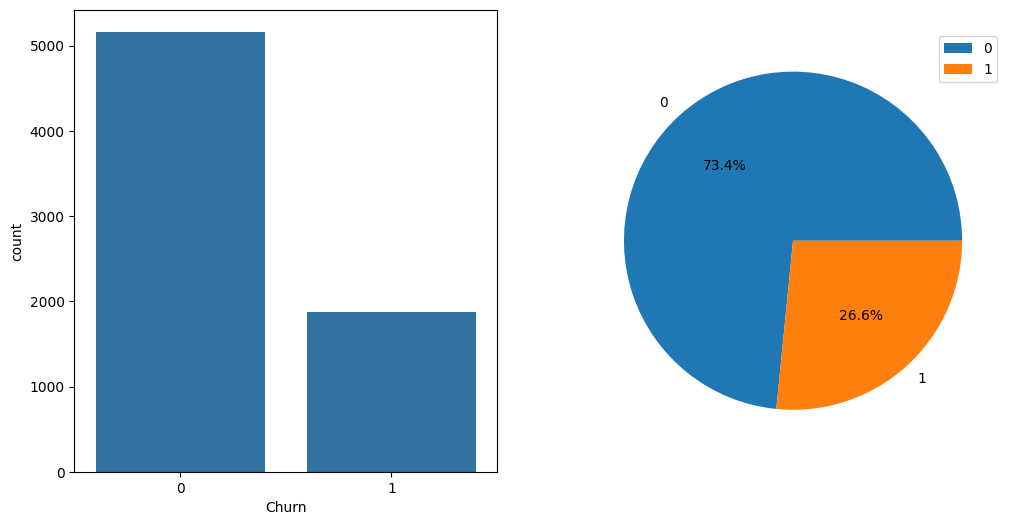

In [240]:
# 이탈고객의 현황 시각화
# countplot

f, ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(data=df, x='Churn', ax=ax[0])
ax[1].pie(df['Churn'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
ax[1].legend()


# 계약종류, 가입기간

plt.show()

C:\Users\31799\AppData\Local\Temp\ipykernel_20164\2268170466.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalChargesGrade'] = pd.qcut(df['TotalCharges'], q=3, labels=bins)


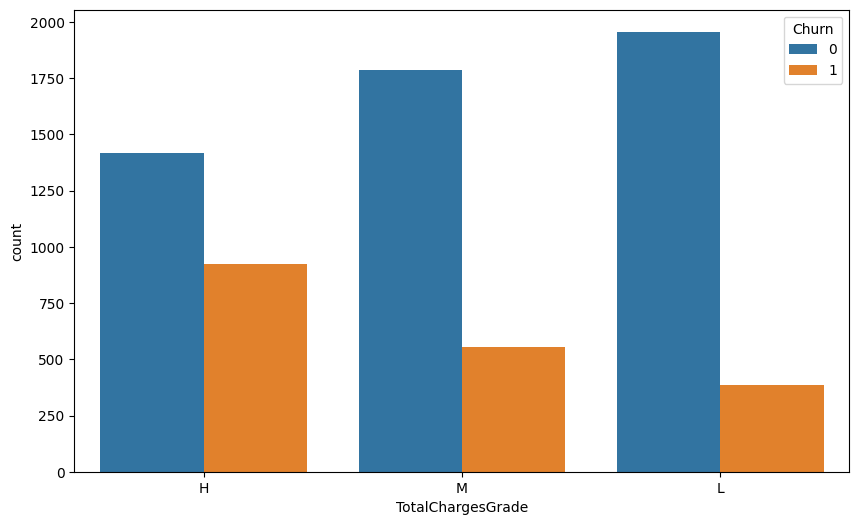

In [241]:
# 타깃이 되는 변수와 같이 영향을 미치는 다른 변수와의 관계
df.head()
# 비용에 따른 가입유지 여부
# totalcharges 3등분해서 (H, M, L) --> 새로운 컬럼에 추가
# 새로운 컬럼별 가입여부에 대한 groupby를 해서 시각화 까지
plt.figure(figsize=(10,6))

bins = ["H", "M", "L"]
df['TotalChargesGrade'] = pd.qcut(df['TotalCharges'], q=3, labels=bins)
sns.countplot(data=df, x='TotalChargesGrade', hue='Churn')

plt.show()

C:\Users\31799\AppData\Local\Temp\ipykernel_20164\2290406478.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tenure_gr'] = pd.cut(df['tenure'], bins=np.arange(0, 80, 10))
C:\Users\31799\AppData\Local\Temp\ipykernel_20164\2290406478.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MonthlyCharges_gr'] = pd.cut(df['MonthlyCharges'], bins=np.arange(0, 130, 10))


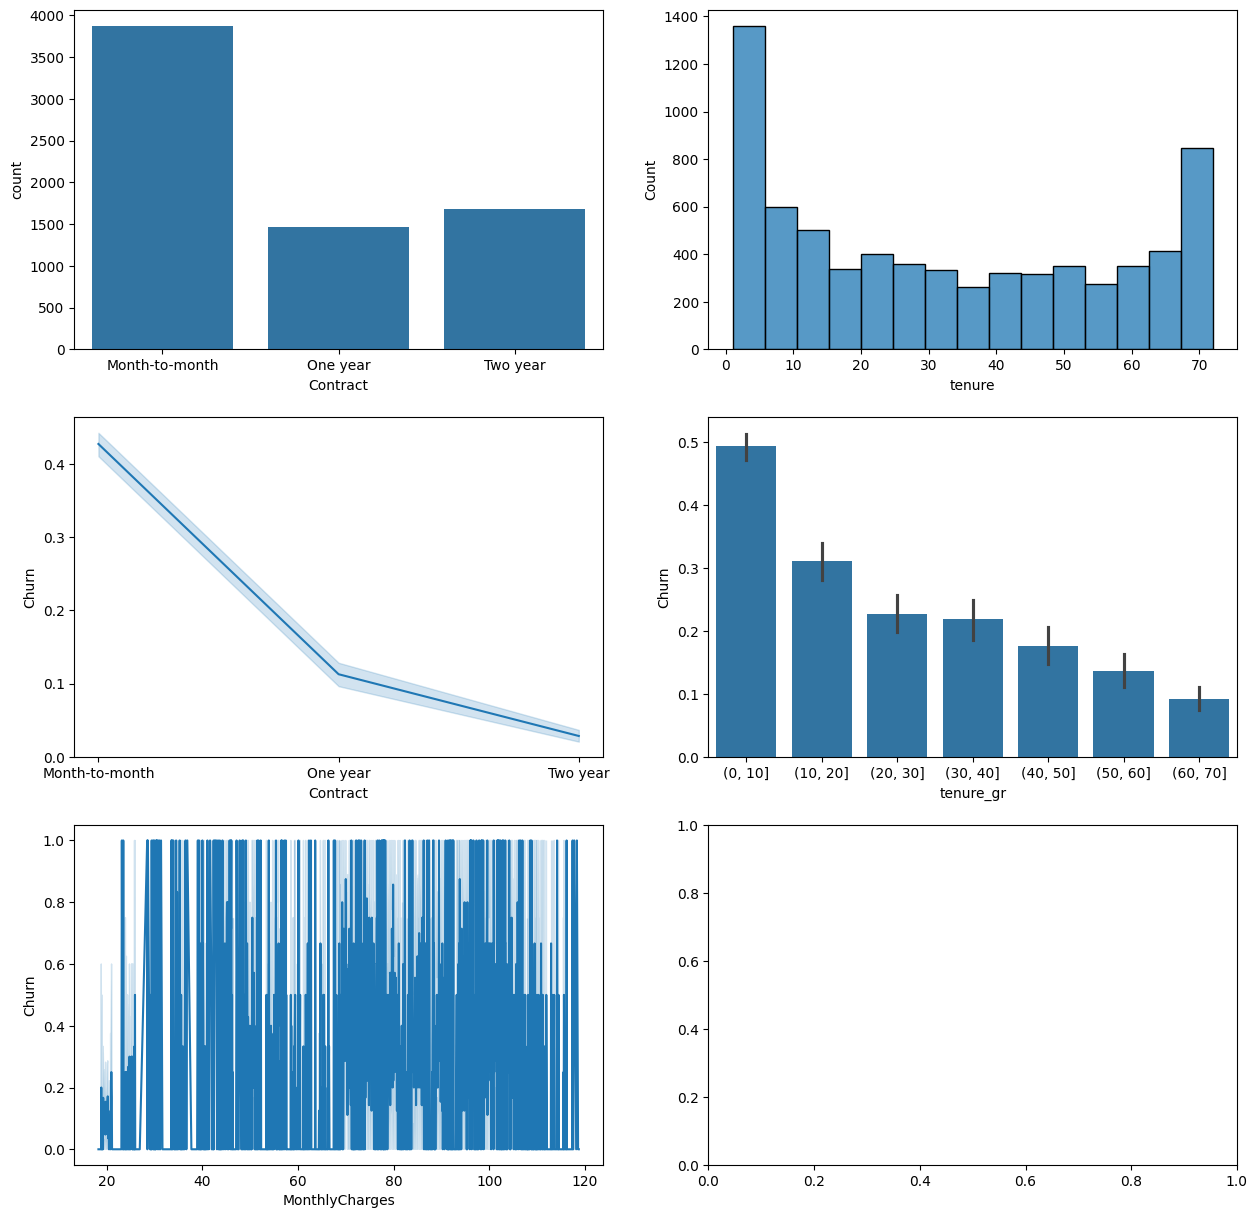

In [242]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

# 계약 종류(Contract) 에 따른 고객 분포
sns.countplot(data=df, x= 'Contract', ax=ax[0,0])

# 가입 기간(tenure) 분포
sns.histplot(data=df, x='tenure', ax=ax[0,1])

# 계약 종류에 따른 이탈률
sns.lineplot(data=df, x='Contract', y='Churn', ax=ax[1,0])

# 가입 기간에 따른 이탈률
df['tenure_gr'] = pd.cut(df['tenure'], bins=np.arange(0, 80, 10))
sns.barplot(data=df, x='tenure_gr', y='Churn', ax=ax[1,1])

# 월 요금에 따른 이탈률
df['MonthlyCharges_gr'] = pd.cut(df['MonthlyCharges'], bins=np.arange(0, 130, 10))
sns.lineplot(data=df, x='MonthlyCharges', y='Churn', ax=ax[2,0])

# 상관관계 분석 (Correlation Analysis)




plt.show()


In [243]:
# 상관관계
# df.info()
# df 수치형 데이터...(문자열이 아닌) 들로만 구성을 해서 .corr() 함수 적용
df.describe().columns
df.loc[:, df.describe().columns].corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000


In [244]:
# 상관계수
# 'pearson', 'kendall', 'spearman'
# pearson : 변수들 사이에 선형관계
# spearman : 선형관계가 아닌 비선형 관계, 이상치가 있을때, 순위로 바꾸면 이상치의 영향이 크게 줄어든다.
#   순서테이터 : 만족도 등과 같이 값 자체가 순서인 데이터
# kendall : 데이터 샘플이 적을때 일치하는 쌍과 불일치하는 쌍의 개수

In [245]:
df.describe(include='object')
remove_cols = ['customerID']

In [249]:
# 수치형 데이터만 추출
preprocess_df = df.loc[:, df.describe().columns].drop(columns=['TotalCharges'])
# 상관계수의 값을 통해 값이 높거나 낮은 변수들은 한개만 선택(제외)
# 고객아이디는 제거

In [250]:
x = preprocess_df.iloc[:,:-1]
y = preprocess_df['Churn']


In [ ]:
split_index = int(np.round(len(x)*0.8))
train_x = x[:split_index]
test_x = x[split_index:]
train_y = y[:split_index]
test_y = y[split_index:]

len(train_x), len(test_x), len(train_y), len(test_y)



(5626, 1406, 5626, 1406)